# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Problem Definition
Given a dataset of used car attributes such as year, model, manufacturer, condition, title_status and other key features, predict the price of a used car. In additon, analyze and recommend what features influence the car price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [640]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [641]:
cars = pd.read_csv("data/vehicles.csv")
cars

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [642]:
cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07


In [643]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [644]:
cars.shape

(426880, 18)

**Identify entries with invalid price value**

In [645]:
(cars['price'] > 500).value_counts()

price
True     383765
False     43115
Name: count, dtype: int64

**Identify null values** 

In [646]:
cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

**Plots to understand the relatiionship of car price with six possible key features**

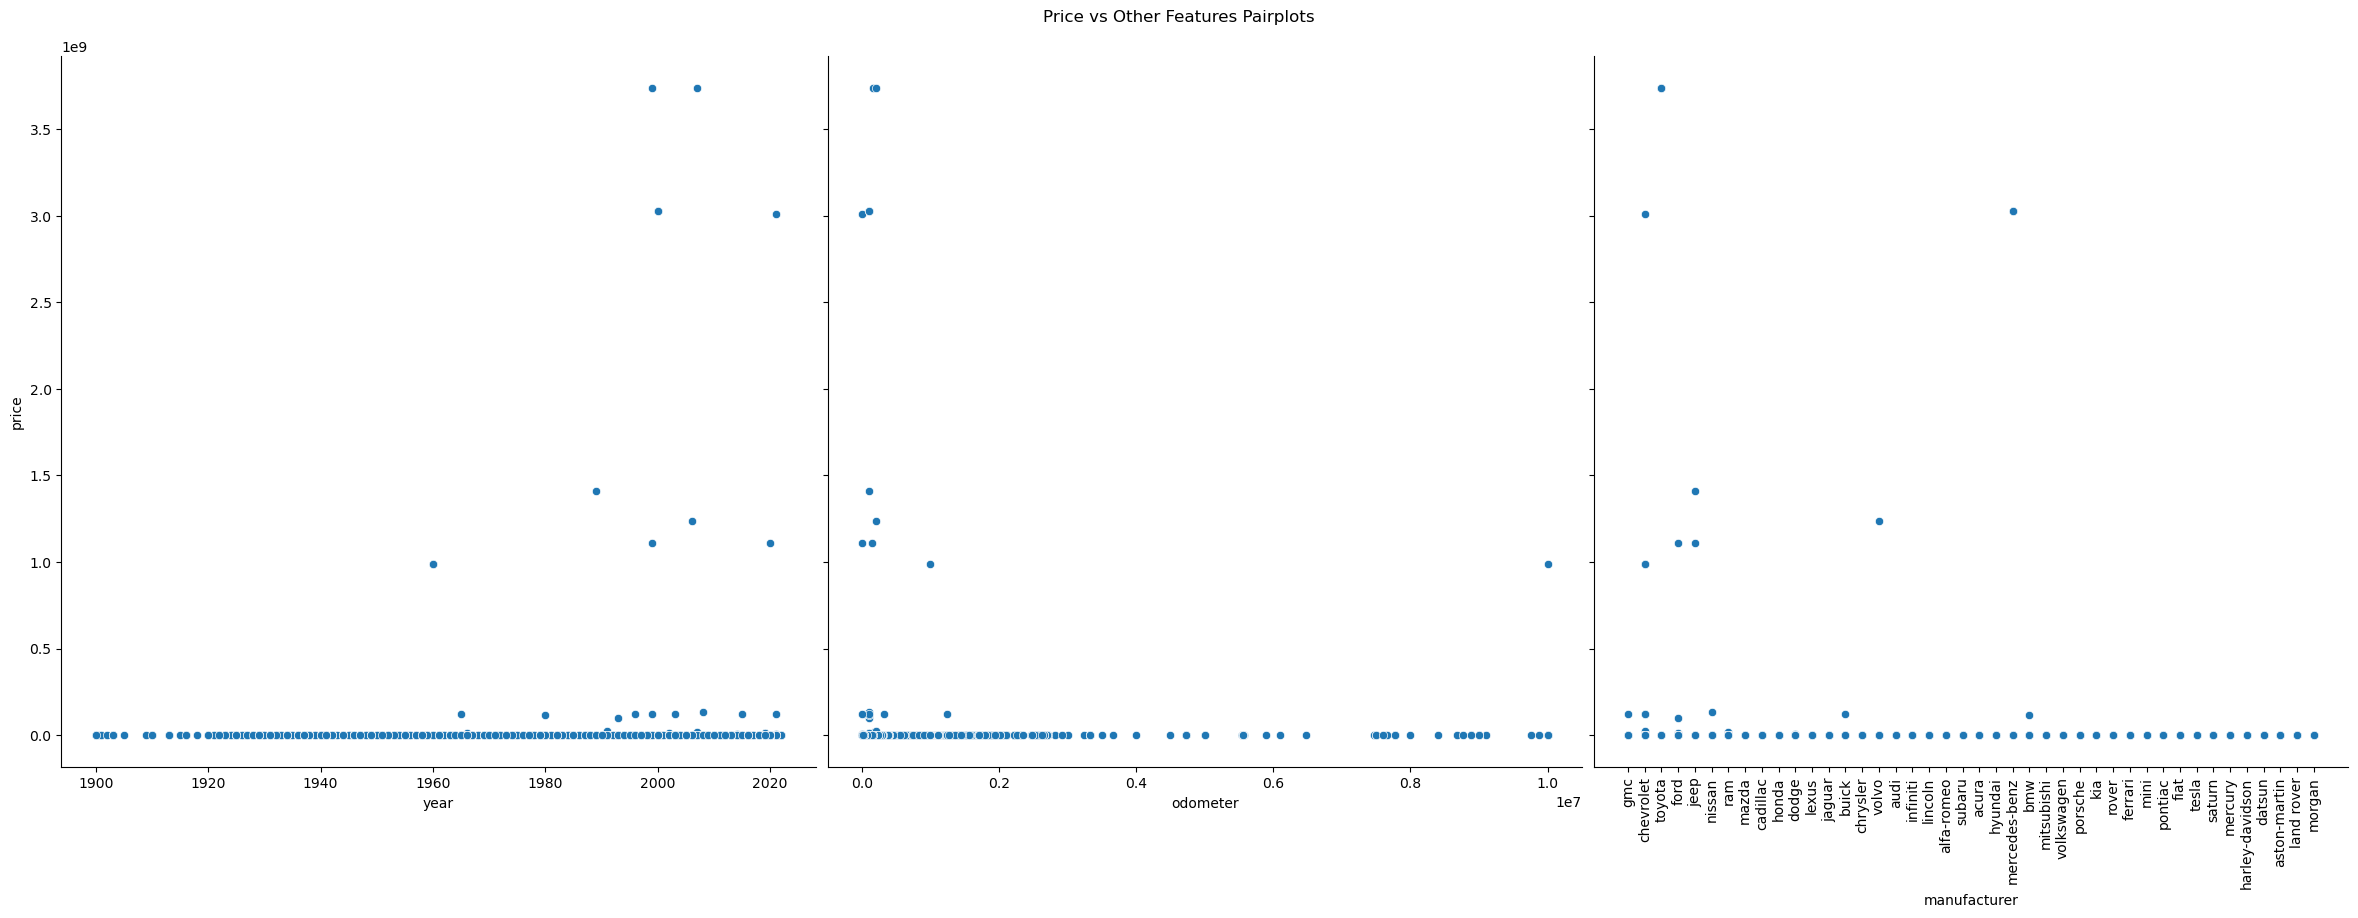

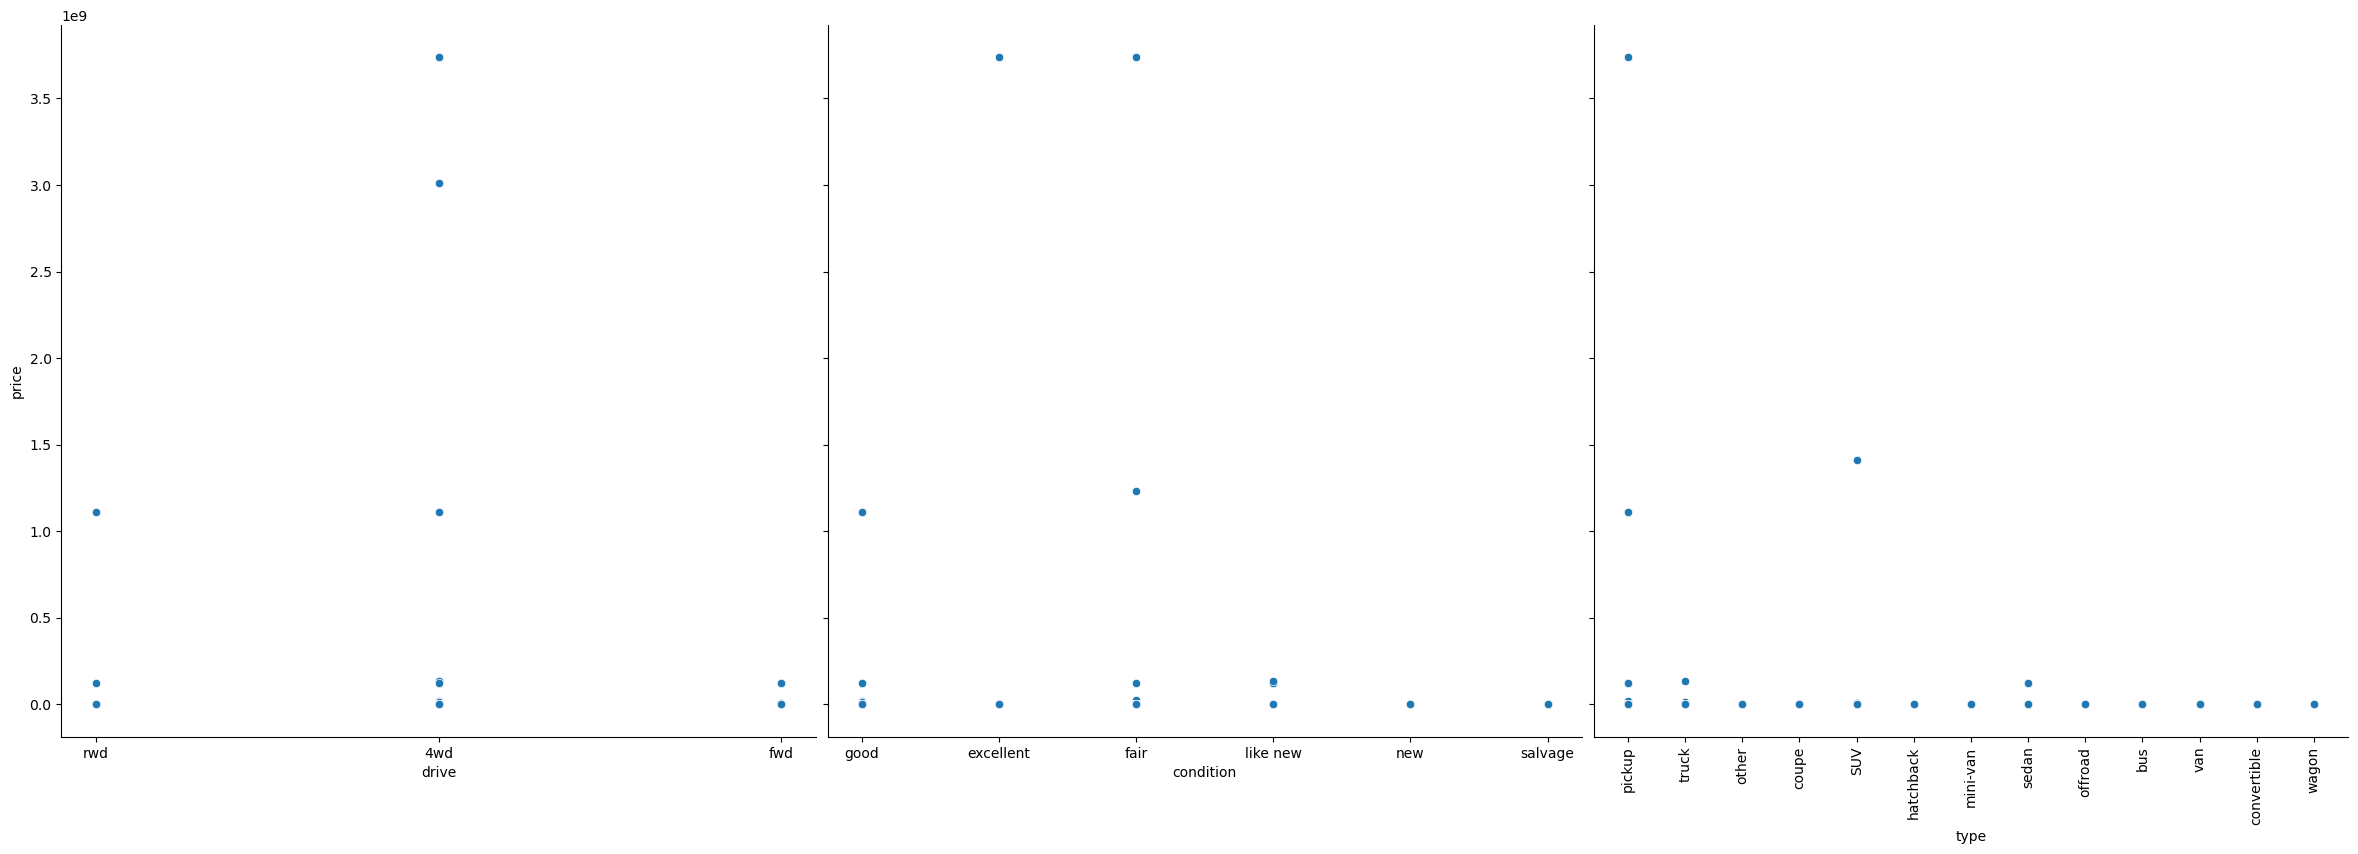

In [647]:

features = ['price', 'year', 'odometer', 'manufacturer']
features2 = ['price', 'drive', 'condition', 'type']
cars_sub = cars[features]
cars_sub2 = cars[features2]


#Adjust sample size
#cars_plot = cars_sub.sample(n=10000, random_state=42)


sns.pairplot(cars_sub, x_vars=features[1:], y_vars='price', kind='scatter', height=8)
plt.xticks(rotation=90)
plt.suptitle("Price vs Other Features Pairplots", y=1.02)
sns.pairplot(cars_sub2, x_vars=features2[1:], y_vars='price', kind='scatter', height=8)
plt.xticks(rotation=90)


plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

 **Remove duplicate rows if any and rows with null price**

In [648]:
cars_clean = cars.drop_duplicates()
cars_clean = cars_clean[cars_clean['price'].notnull()]
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**Drop ID and VIN columns that doesn't impact car price. Drop region column with 404 unique values and keep only the state column**

In [649]:
cars_clean = cars.drop(columns=["id", "VIN"],inplace=False)
cars_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


**Drop rows where manufacturer,model and odometer columns have NaN values**  

In [650]:
cars_clean.dropna(subset=['manufacturer','model','odometer'], inplace=True)
cars_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [651]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399889 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        399889 non-null  object 
 1   price         399889 non-null  int64  
 2   year          399883 non-null  float64
 3   manufacturer  399889 non-null  object 
 4   model         399889 non-null  object 
 5   condition     237800 non-null  object 
 6   cylinders     235591 non-null  object 
 7   fuel          397880 non-null  object 
 8   odometer      399889 non-null  float64
 9   title_status  392716 non-null  object 
 10  transmission  398281 non-null  object 
 11  drive         280323 non-null  object 
 12  size          112695 non-null  object 
 13  type          316653 non-null  object 
 14  paint_color   280571 non-null  object 
 15  state         399889 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 51.9+ MB


**Cleanup outliers wrt price. Keep entries where price range is between 500 and 150000**

In [652]:
cars_clean = cars_clean[(cars_clean['price'] > 500) & (cars_clean['price'] < 150000)]
cars_clean[['price']].sort_values(ascending=False, by='price').head(10)
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361787 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        361787 non-null  object 
 1   price         361787 non-null  int64  
 2   year          361783 non-null  float64
 3   manufacturer  361787 non-null  object 
 4   model         361787 non-null  object 
 5   condition     224998 non-null  object 
 6   cylinders     215081 non-null  object 
 7   fuel          359823 non-null  object 
 8   odometer      361787 non-null  float64
 9   title_status  355488 non-null  object 
 10  transmission  360332 non-null  object 
 11  drive         253360 non-null  object 
 12  size          101124 non-null  object 
 13  type          286756 non-null  object 
 14  paint_color   258474 non-null  object 
 15  state         361787 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 46.9+ MB


**Identify the value counts for each of the remaining categorical features**

In [653]:
for col in cars_clean.select_dtypes(include = 'object').columns.tolist():
  print(cars_clean[col].value_counts())

region
columbus               3191
jacksonville           2902
grand rapids           2825
kansas city, MO        2751
nashville              2719
                       ... 
meridian                 15
southwest MS             12
kansas city               8
west virginia (old)       7
fort smith, AR            7
Name: count, Length: 404, dtype: int64
manufacturer
ford               62826
chevrolet          48390
toyota             30504
honda              19179
nissan             16593
jeep               16558
ram                15297
gmc                14901
bmw                13152
dodge              11392
mercedes-benz       9763
hyundai             9002
subaru              8704
volkswagen          8368
lexus               7508
kia                 7220
audi                6945
cadillac            6357
acura               5513
chrysler            5440
buick               5016
mazda               4872
infiniti            4373
lincoln             3937
volvo               3147
mitsubis

**Drop columns that blow up features with OHE or irrelevant columns for further processing**

In [654]:
cars_clean.drop(['model','region','state','size','paint_color'], axis=1, inplace=True)
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361787 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         361787 non-null  int64  
 1   year          361783 non-null  float64
 2   manufacturer  361787 non-null  object 
 3   condition     224998 non-null  object 
 4   cylinders     215081 non-null  object 
 5   fuel          359823 non-null  object 
 6   odometer      361787 non-null  float64
 7   title_status  355488 non-null  object 
 8   transmission  360332 non-null  object 
 9   drive         253360 non-null  object 
 10  type          286756 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 33.1+ MB


**Limit the cars data from year=1980**

In [655]:
cars_clean = cars_clean[cars_clean['year'] > 1980]
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355979 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         355979 non-null  int64  
 1   year          355979 non-null  float64
 2   manufacturer  355979 non-null  object 
 3   condition     220907 non-null  object 
 4   cylinders     211098 non-null  object 
 5   fuel          354026 non-null  object 
 6   odometer      355979 non-null  float64
 7   title_status  349681 non-null  object 
 8   transmission  354526 non-null  object 
 9   drive         249737 non-null  object 
 10  type          283385 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 32.6+ MB


**Handle categorical columns - fill NaN with "Unknown" value** 

In [656]:
cat_cols = cars_clean.select_dtypes(include=["object"]).columns
    
for col in cat_cols:
    cars_clean[col] = cars_clean[col].fillna("Unknown")
    #top_cats = cars_clean[col].value_counts().index[:20]
    #cars_clean[col] = cars_clean[col].where(cars_clean[col].isin(top_cats), other="other")
for col in cars_clean.select_dtypes(include = 'object').columns.tolist():
  print(cars_clean[col].value_counts())

manufacturer
ford               61095
chevrolet          46476
toyota             30437
honda              19172
nissan             16591
jeep               16341
ram                15297
gmc                14768
bmw                13143
dodge              11098
mercedes-benz       9608
hyundai             9002
subaru              8703
volkswagen          8049
lexus               7508
kia                 7220
audi                6945
cadillac            6256
acura               5512
chrysler            5386
buick               4886
mazda               4868
infiniti            4373
lincoln             3858
volvo               3125
mitsubishi          2983
mini                2189
pontiac             1864
jaguar              1831
rover               1632
porsche             1203
saturn              1036
mercury              938
alfa-romeo           845
tesla                820
fiat                 705
harley-davidson      124
ferrari               44
aston-martin          20
datsun      

**Fill NaN numerical fields with median value**

In [657]:
for col in cars_clean.select_dtypes(include=['int64', 'float64']).columns:
    cars_clean[col] = cars_clean[col].fillna(cars_clean[col].median())

cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355979 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         355979 non-null  int64  
 1   year          355979 non-null  float64
 2   manufacturer  355979 non-null  object 
 3   condition     355979 non-null  object 
 4   cylinders     355979 non-null  object 
 5   fuel          355979 non-null  object 
 6   odometer      355979 non-null  float64
 7   title_status  355979 non-null  object 
 8   transmission  355979 non-null  object 
 9   drive         355979 non-null  object 
 10  type          355979 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 32.6+ MB


**Analyze cleaned data and compare with original dataset**

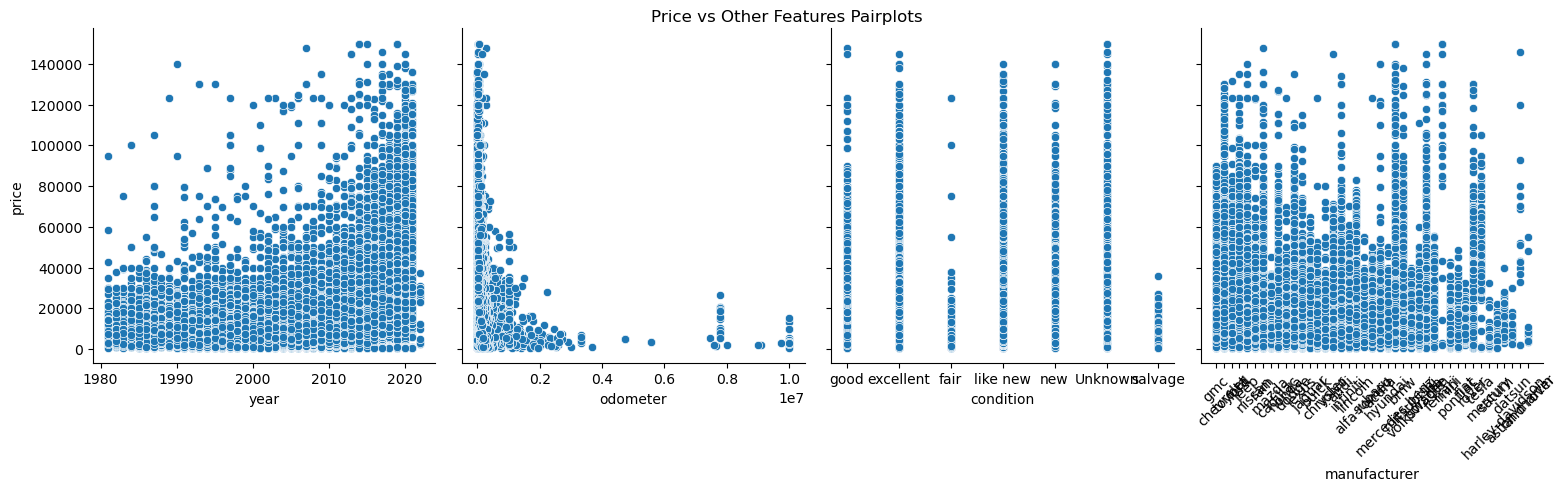

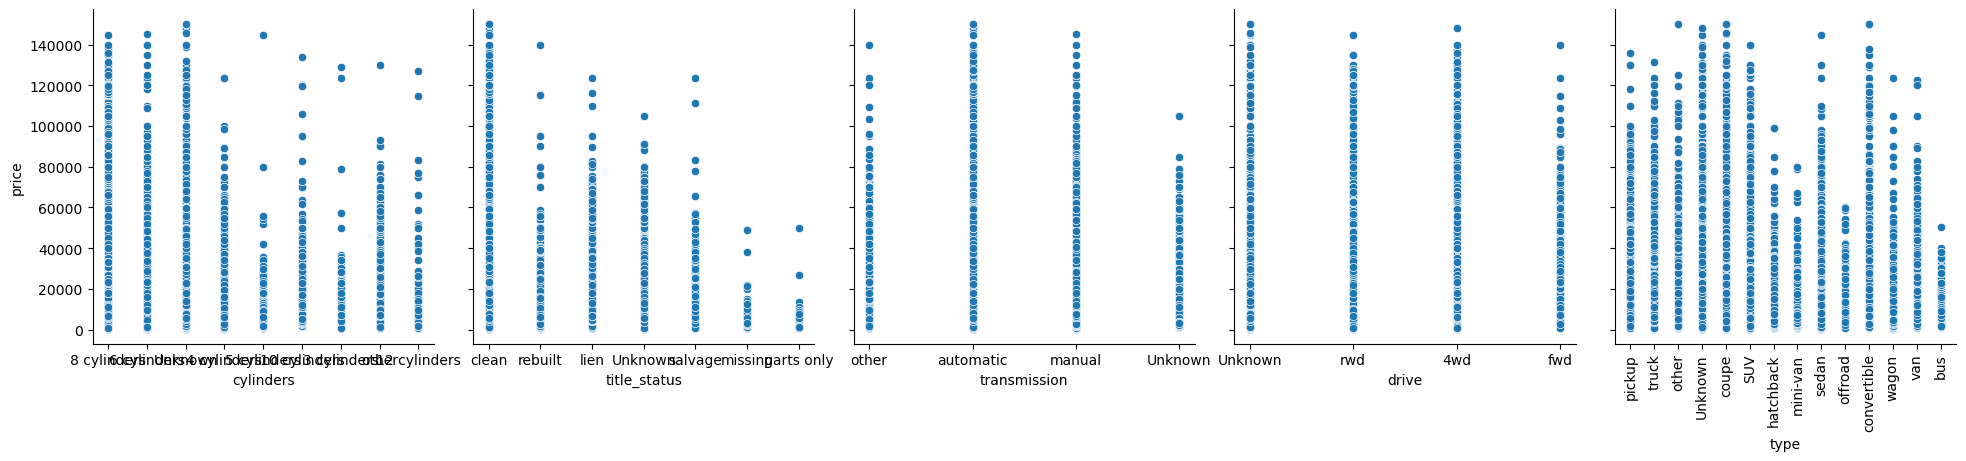

In [658]:
#plt.figure(figsize=(16,10))

features1 = ['price', 'year', 'odometer', 'condition', 'manufacturer']
features2 = ['price', 'cylinders', 'title_status', 'transmission', 'drive', 'type']
cars_sub1 = cars_clean[features1]
cars_sub2 = cars_clean[features2]

#Adjust sample size
#cars_plot = cars_sub.sample(n=10000, random_state=42)


sns.pairplot(cars_sub1, x_vars=features1[1:], y_vars='price', kind='scatter', height=4)
plt.xticks(rotation=45)
plt.suptitle("Price vs Other Features Pairplots", y=1.02)
sns.pairplot(cars_sub2, x_vars=features2[1:], y_vars='price', kind='scatter', height=4)
plt.xticks(rotation=90)

plt.show()



/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


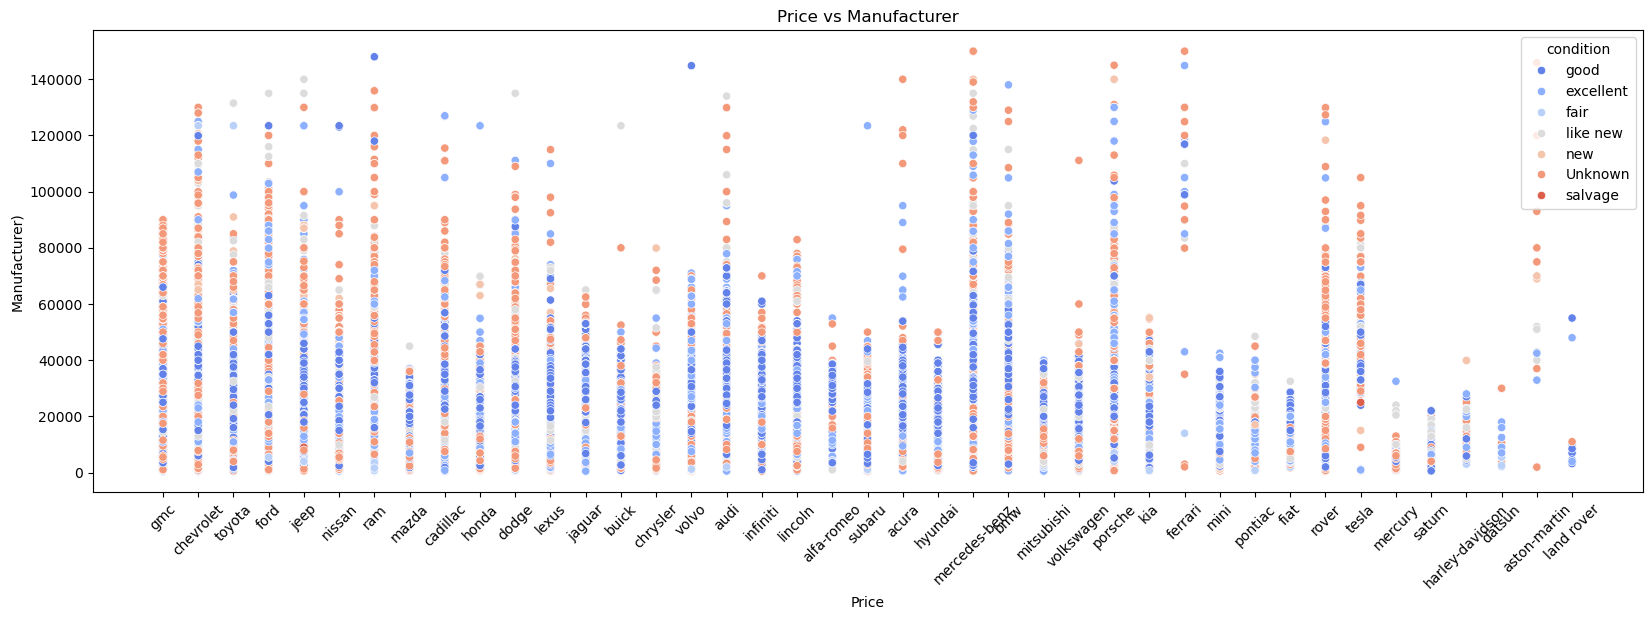

In [659]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=cars_clean, x='manufacturer', y='price', hue='condition', palette="coolwarm")
plt.title("Price vs Manufacturer")
plt.xticks(rotation=45)
plt.ylabel("Manufacturer)")
plt.xlabel("Price")
plt.show()

**Trying OneHotEncoder on categorical variables**

In [660]:
from sklearn.preprocessing import StandardScaler

cat_features = ['manufacturer', 'condition', 'cylinders', 'title_status', 'transmission', 'drive', 'type']
num_features = ['year','odometer']

num_transformer = Pipeline([('pfeatures', PolynomialFeatures(degree=2,include_bias=False)), ('scaler', StandardScaler())])
cat_transformer = Pipeline ([('ohe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_features),
                  ('cat', cat_transformer, cat_features)])


**Split test/train data for simple cross validation**

In [661]:
X = cars_clean[cat_features + num_features]
print(X.head())
y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print (X_test.shape)
print (y_test.shape)

   manufacturer  condition    cylinders title_status transmission    drive  \
27          gmc       good  8 cylinders        clean        other  Unknown   
28    chevrolet       good  8 cylinders        clean        other  Unknown   
29    chevrolet       good  8 cylinders        clean        other  Unknown   
30       toyota       good  8 cylinders        clean        other  Unknown   
31         ford  excellent  6 cylinders        clean    automatic      rwd   

      type    year  odometer  
27  pickup  2014.0   57923.0  
28  pickup  2010.0   71229.0  
29  pickup  2020.0   19160.0  
30  pickup  2017.0   41124.0  
31   truck  2013.0  128000.0  
(284783, 9)
(284783,)
(71196, 9)
(71196,)


In [662]:
X.shape

(355979, 9)

### Trial - Label encoder + Heatmap to undertstand feature correlation

**Apply LabelEncoder on categorical variables**

In [663]:
from sklearn.preprocessing import LabelEncoder

for col in cars_clean.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    cars_clean[col] = le.fit_transform(cars_clean[col].astype(str))
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355979 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         355979 non-null  int64  
 1   year          355979 non-null  float64
 2   manufacturer  355979 non-null  int64  
 3   condition     355979 non-null  int64  
 4   cylinders     355979 non-null  int64  
 5   fuel          355979 non-null  int64  
 6   odometer      355979 non-null  float64
 7   title_status  355979 non-null  int64  
 8   transmission  355979 non-null  int64  
 9   drive         355979 non-null  int64  
 10  type          355979 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 32.6 MB


**Find correlation between variables. Plot sns heatmap**

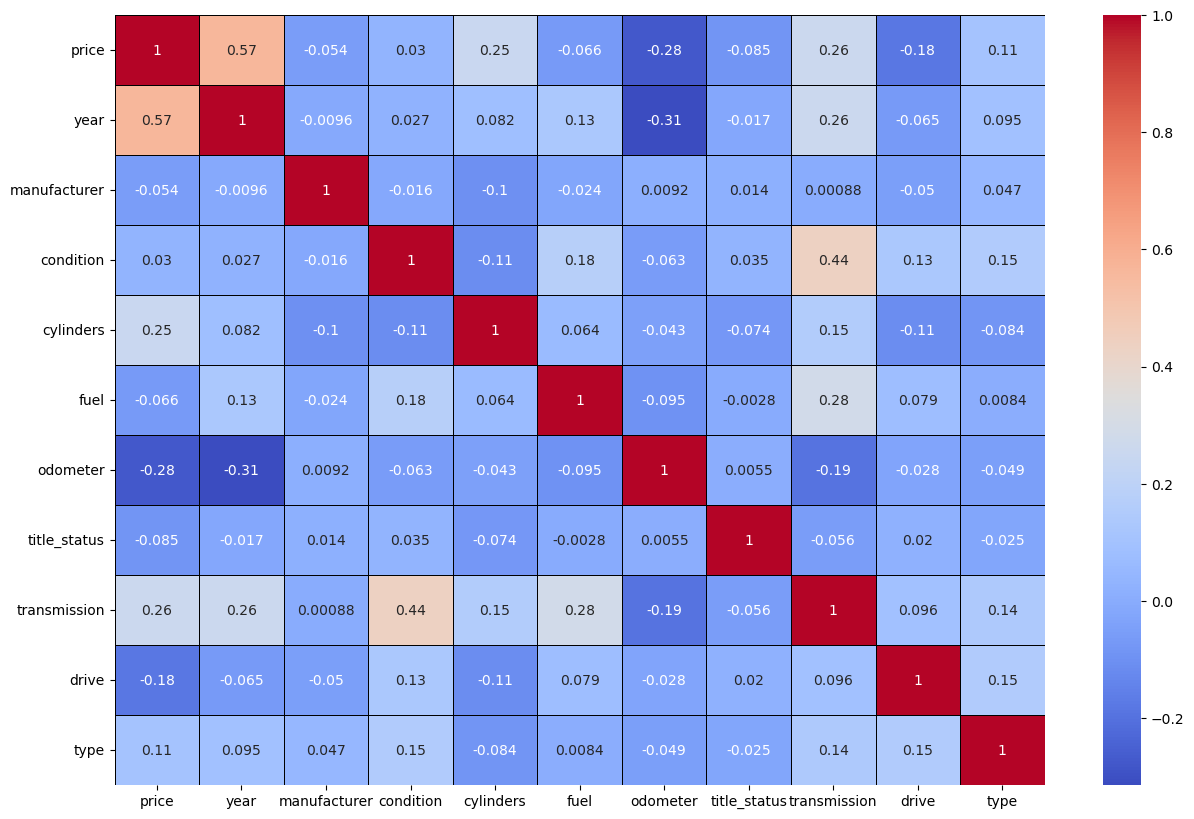

In [664]:
corr = cars_clean.corr()

#Generate the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black',
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

**The above heatmap shows year and price are highly correlated**

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Model#1 Standard Linear Regression

**Use SequentialFeatureSelector and Linear regression pipeline**

In [665]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LinearRegression

#Creating a pipeline
# one or more test scores are not finite with SequentialFeatureSelector and PCA included
#pipeline = Pipeline([('Preprocessor', preprocessor), ('pca', PCA()), ('selector', SequentialFeatureSelector(LinearRegression())),('linreg', LinearRegression())])  
pipeline = Pipeline([('Preprocessor', preprocessor),
                     ('pca', PCA()),
                     ('linreg', LinearRegression())])
pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('pfeatures',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'title_status',
                                                   'transmission', 'drive',
                                                   'type'])])),
                ('pca', PCA()), ('linreg', LinearRegression())])

**Use GridSearchCV for feature selection**

In [666]:
from sklearn.model_selection import GridSearchCV

params = {'pca__n_components': [40,50,60,70,80]}
#params = {'selector__n_features_to_select': [4,6]}
#params = [{'pca__n_components': [1,2,10,20]}, {'selector__n_features_to_select': [2,4,6,8]}]

lin_grid = GridSearchCV(pipeline,
                    param_grid=params,
                    verbose=2
                )

lin_grid.fit(X_train,y_train)

print ("Best params: ", lin_grid.best_params_)
print ("CV best score:", lin_grid.best_score_ )


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...............................pca__n_components=40; total time=   2.3s
[CV] END ...............................pca__n_components=40; total time=   2.3s
[CV] END ...............................pca__n_components=40; total time=   2.5s
[CV] END ...............................pca__n_components=40; total time=   2.2s
[CV] END ...............................pca__n_components=40; total time=   2.2s
[CV] END ...............................pca__n_components=50; total time=   2.7s
[CV] END ...............................pca__n_components=50; total time=   2.5s
[CV] END ...............................pca__n_components=50; total time=   2.6s
[CV] END ...............................pca__n_components=50; total time=   2.7s
[CV] END ...............................pca__n_components=50; total time=   2.7s
[CV] END ...............................pca__n_components=60; total time=   3.1s
[CV] END ...............................pca__n_co

In [667]:
#pipeline.named_steps['linreg'].coef_
print(f'CV Results: {lin_grid.cv_results_}')
#print(f'Number of features seen during fit: {lin_grid.n_features_in_}')
#print (f'Features seen during fit: {lin_grid.feature_names_in_}')


CV Results: {'mean_fit_time': array([2.18274736, 2.52081232, 3.039223  , 3.64663963, 4.28272963]), 'std_fit_time': array([0.13344493, 0.07844266, 0.06122244, 0.07031506, 0.08392641]), 'mean_score_time': array([0.11590371, 0.11957951, 0.11828852, 0.12416372, 0.12456727]), 'std_score_time': array([0.00501311, 0.00782104, 0.00238953, 0.01104524, 0.00765591]), 'param_pca__n_components': masked_array(data=[40, 50, 60, 70, 80],
             mask=[False, False, False, False, False],
       fill_value=999999), 'params': [{'pca__n_components': 40}, {'pca__n_components': 50}, {'pca__n_components': 60}, {'pca__n_components': 70}, {'pca__n_components': 80}], 'split0_test_score': array([0.57281838, 0.57641765, 0.58005098, 0.58619353, 0.58836898]), 'split1_test_score': array([0.57754895, 0.58179712, 0.58522491, 0.59406335, 0.59801498]), 'split2_test_score': array([0.57207673, 0.57605934, 0.57976208, 0.58709969, 0.5921503 ]), 'split3_test_score': array([0.57866932, 0.58292174, 0.58750177, 0.59349878,

**Calculate Root Mean Squared Error for model comparison**

In [668]:
lin_train_preds = lin_grid.predict(X_train)
lin_test_preds = lin_grid.predict(X_test)
lin_train_rmse = root_mean_squared_error(y_train, lin_train_preds)
lin_test_rmse = root_mean_squared_error(y_test, lin_test_preds)
lin_r2 = r2_score(y_test, lin_test_preds)

linreg_coefs = lin_grid.best_estimator_.named_steps['linreg'].coef_
print(f'Linear Regression coef: {linreg_coefs}\n')

print(f'LinearRegression Train RMSE: {lin_train_rmse}')
print(f'LinearRegression Test RMSE: {lin_test_rmse}')
print(f'Linear Regression R2 score: {lin_r2}')

Linear Regression coef: [-3.21266700e+03  4.57099554e+03  1.25526731e+02 -7.05676207e+01
 -8.81064785e+03 -1.99147368e+03 -3.69839144e+03  2.25250154e+03
 -3.93129853e+03 -3.66770834e+03  1.17236766e+03  2.24759521e+03
  2.30097264e+03  1.28244361e+03 -1.27153573e+03 -2.48198679e+03
 -5.67869051e+02  1.96858409e+03  1.00175399e+03  2.75647454e+02
  3.52830439e+03 -1.52937059e+03  2.43474276e+03  1.24956351e+03
 -4.18920668e+03  1.27181044e+03  1.05134861e+03 -4.36289254e+03
  2.37625021e+02  1.37746306e+03 -3.74037771e+03 -3.31409166e+03
  2.43756685e+03 -4.31102824e+03  4.55084792e+02 -9.44852201e+02
 -2.09483796e+03  5.12185082e+03  4.58528846e+03  2.11920096e+03
  3.32613370e+03  6.57656754e+02  1.79222182e+03 -1.19260862e+03
 -3.50184289e+01 -4.58280658e+03 -2.00582374e+03 -2.44576646e+03
  2.36923842e+03 -1.87975943e+03  5.80084589e+02  2.30867945e+03
  1.26393840e+03 -5.05461880e+03  5.06019177e+02  5.22418284e+03
 -1.59375258e+03  3.26847427e+03 -2.81689396e+03  6.91273234e+03
 

In [669]:
# Calculate the permutation importance
results = permutation_importance(lin_grid, X_test, y_test)
importances = pd.DataFrame(data=results.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

              Importance
year            0.402806
odometer        0.104462
manufacturer    0.076619
type            0.075997
drive           0.058101
cylinders       0.030052
transmission    0.010240
condition       0.008920
title_status    0.007694


### Model#2 Lasso Regression

**Use PCA as the GridSearchCV fitting did not converge without PCA**

In [670]:
lasso_pipe = Pipeline([('Preprocessor', preprocessor),
                       ('pca', PCA(n_components=12)),
                       ('lasso', Lasso())])
lasso_pipe

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('pfeatures',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'title_status',
                                                   'transmission', 'drive',
                                                   'type'])])),
                ('pca', PCA(n_components=12)), ('lasso', Lasso())])

In [671]:
lasso_params = {'lasso__alpha': [.001,.01,1.0,10.0,100.0,1000.0]}

lasso_grid = GridSearchCV(lasso_pipe,
                    param_grid=lasso_params,
                    verbose=2
                )

lasso_grid.fit(X_train,y_train)

print ("Best params: ", lasso_grid.best_params_)
print ("CV best score:", lasso_grid.best_score_ )


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................lasso__alpha=0.001; total time=   1.0s
[CV] END .................................lasso__alpha=0.001; total time=   1.0s
[CV] END .................................lasso__alpha=0.001; total time=   1.0s
[CV] END .................................lasso__alpha=0.001; total time=   1.0s
[CV] END .................................lasso__alpha=0.001; total time=   1.0s
[CV] END ..................................lasso__alpha=0.01; total time=   1.0s
[CV] END ..................................lasso__alpha=0.01; total time=   1.0s
[CV] END ..................................lasso__alpha=0.01; total time=   1.1s
[CV] END ..................................lasso__alpha=0.01; total time=   1.1s
[CV] END ..................................lasso__alpha=0.01; total time=   1.1s
[CV] END ...................................lasso__alpha=1.0; total time=   1.2s
[CV] END ...................................lasso

In [672]:
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)
lasso_train_rmse = root_mean_squared_error(y_train, lasso_train_preds)
lasso_test_rmse = root_mean_squared_error(y_test, lasso_test_preds)
lasso_r2 = r2_score(y_test, lasso_test_preds)

lasso_coefs = lasso_grid.best_estimator_.named_steps['lasso'].coef_
print(f'Lasso Regression coef: {lasso_coefs}\n')

print(f'Lasso Regression Train RMSE: {lasso_train_rmse}')
print(f'Lasso Regression Test RMSE: {lasso_test_rmse}')
print(f'Lasso Regression R2 score: {lasso_r2}')

#print(lasso_grid.best_estimator_.named_steps['pca'].explained_variance_ratio_) # choose 12 components to capture 80% variance

Lasso Regression coef: [-3212.34433245  4570.44228117   123.70830673   -68.56115107
 -8808.16409484 -1987.30951133 -3694.10013515  2247.55047845
 -3925.42025053 -3661.58866515  1165.65167548  2240.66990262]

Lasso Regression Train RMSE: 9745.461710207639
Lasso Regression Test RMSE: 9808.207015265989
Lasso Regression R2 score: 0.5346099244240947


In [673]:
# Calculate the permutation importance
results = permutation_importance(lasso_grid, X_test, y_test)
importances = pd.DataFrame(data=results.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

              Importance
year            0.413073
drive           0.115087
odometer        0.075331
cylinders       0.048725
type            0.027631
transmission    0.019313
condition       0.014559
manufacturer    0.005518
title_status    0.000526


### Model#3 Ridge Regression with PCA

In [674]:
ridgep_pipe = Pipeline([('Preprocessor', preprocessor),
                       ('pca', PCA(n_components=12)),
                       ('ridge', Ridge())])
ridgep_pipe

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('pfeatures',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'title_status',
                                                   'transmission', 'drive',
                                                   'type'])])),
                ('pca', PCA(n_components=12)), ('ridge', Ridge())])

In [675]:
ridge_params = {'ridge__alpha': [.001,.01,1.0,10.0,100.0,1000.0]}

ridgep_grid = GridSearchCV(ridgep_pipe,
                          param_grid=ridge_params,
                          verbose=2)

ridgep_grid.fit(X_train,y_train)

print ("Best params: ", ridgep_grid.best_params_)
print ("CV best score:", ridgep_grid.best_score_ )

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................ridge__alpha=0.001; total time=   1.0s
[CV] END .................................ridge__alpha=0.001; total time=   1.0s
[CV] END .................................ridge__alpha=0.001; total time=   1.1s
[CV] END .................................ridge__alpha=0.001; total time=   1.0s
[CV] END .................................ridge__alpha=0.001; total time=   1.0s
[CV] END ..................................ridge__alpha=0.01; total time=   1.0s
[CV] END ..................................ridge__alpha=0.01; total time=   1.0s
[CV] END ..................................ridge__alpha=0.01; total time=   1.0s
[CV] END ..................................ridge__alpha=0.01; total time=   1.0s
[CV] END ..................................ridge__alpha=0.01; total time=   1.0s
[CV] END ...................................ridge__alpha=1.0; total time=   1.0s
[CV] END ...................................ridge

In [676]:
ridgep_train_preds = ridgep_grid.predict(X_train)
ridgep_test_preds = ridgep_grid.predict(X_test)
ridgep_train_rmse = root_mean_squared_error(y_train, ridgep_train_preds)
ridgep_test_rmse = root_mean_squared_error(y_test, ridgep_test_preds)
ridgep_r2 = r2_score(y_test, ridgep_test_preds)

ridgep_coefs = ridgep_grid.best_estimator_.named_steps['ridge'].coef_
print(f'Ridge Regression coef: {ridgep_coefs}\n')

print(f'Ridge Regression with PCA Train RMSE: {ridgep_train_rmse}')
print(f'Ridge Regression with PCA Test RMSE: {ridgep_test_rmse}')
print(f'Ridge Regression with PCA R2 score: {ridgep_r2}')

Ridge Regression coef: [-3212.30303717  4570.10768807   125.44662957   -70.51793651
 -8802.97027836 -1988.56594987 -3692.82683736  2248.59227582
 -3923.20055152 -3659.84373758  1169.6093895   2242.14280385]

Ridge Regression with PCA Train RMSE: 9745.462652353981
Ridge Regression with PCA Test RMSE: 9808.204771703391
Ridge Regression with PCA R2 score: 0.5346101373338846


In [677]:
# Calculate the permutation importance
results = permutation_importance(ridgep_grid, X_test, y_test)
importances = pd.DataFrame(data=results.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

              Importance
year            0.414171
drive           0.114643
odometer        0.076145
cylinders       0.048958
type            0.027881
transmission    0.019729
condition       0.014724
manufacturer    0.005445
title_status    0.000526


### Model4 - Ridge Regression without PCA

In [678]:
ridge_pipe = Pipeline([('Preprocessor', preprocessor),
                       ('ridge', Ridge())])
ridge_pipe

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('pfeatures',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'title_status',
                                                   'transmission', 'drive',
                                                   'type'])])),
                ('ridge', Ridge())])

In [679]:
ridge_params = {'ridge__alpha': [.001,.01,1.0,10.0,100.0,1000.0]}

ridge_grid = GridSearchCV(ridge_pipe,
                          param_grid=ridge_params,
                          verbose=2)

ridge_grid.fit(X_train,y_train)

print ("Best params: ", ridge_grid.best_params_)
print ("CV best score:", ridge_grid.best_score_ )

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................ridge__alpha=0.001; total time=   2.0s
[CV] END .................................ridge__alpha=0.001; total time=   2.3s
[CV] END .................................ridge__alpha=0.001; total time=   2.4s
[CV] END .................................ridge__alpha=0.001; total time=   2.5s
[CV] END .................................ridge__alpha=0.001; total time=   2.6s
[CV] END ..................................ridge__alpha=0.01; total time=   2.6s
[CV] END ..................................ridge__alpha=0.01; total time=   3.0s
[CV] END ..................................ridge__alpha=0.01; total time=   3.0s
[CV] END ..................................ridge__alpha=0.01; total time=   3.0s
[CV] END ..................................ridge__alpha=0.01; total time=   3.1s
[CV] END ...................................ridge__alpha=1.0; total time=   2.8s
[CV] END ...................................ridge

In [680]:
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_rmse = root_mean_squared_error(y_train, ridge_train_preds)
ridge_test_rmse = root_mean_squared_error(y_test, ridge_test_preds)
ridge_r2 = r2_score(y_test, ridge_test_preds)

ridge_coefs = ridge_grid.best_estimator_.named_steps['ridge'].coef_
print(f'Ridge Regression coef: {ridge_coefs}\n')

print(f'Ridge Regression Train RMSE: {ridge_train_rmse}')
print(f'Ridge Regression Test RMSE: {ridge_test_rmse}')
print(f'Ridge Regression R2 score: {ridge_r2}')

Ridge Regression coef: [-1.34621857e+06  3.28010299e+04  1.35361204e+06 -3.63404293e+04
  2.88552520e+03 -1.17854765e+03 -3.54242446e+02  2.30747572e+04
  4.83287277e+02 -1.93666847e+03 -4.77979670e+03 -1.44768169e+03
 -3.24502711e+03 -6.26428750e+03 -4.07603271e+03 -5.73730719e+03
  7.59831414e+04 -1.09375148e+04 -2.60174377e+03 -6.61157085e+02
 -7.33902121e+03 -3.84470719e+03 -7.73652967e+03 -3.00522769e+03
  7.55543658e+02 -3.69869967e+03 -8.39447386e+03  7.27641486e+03
  1.25677948e+03 -1.99019417e+03 -6.01371442e+03  4.79940517e+02
 -4.98045548e+03 -4.60018545e+03 -8.97116919e+03 -7.37578825e+03
 -3.21953849e+03  1.02763821e+04  4.98585157e+01  3.14060048e+03
 -3.77595523e+03 -6.12774814e+03  1.02490368e+04 -1.98683258e+03
 -5.59358031e+03 -1.15191385e+03  1.32449556e+03 -3.48900192e+02
 -2.87546229e+03 -3.90092582e+02  1.36415559e+02  3.54756608e+03
 -1.39401991e+03  4.46933874e+03  6.48667624e+03 -6.28567300e+03
 -3.78292757e+03 -2.70899290e+03 -7.45792618e+02  2.35195964e+03
 -

In [681]:
# Calculate the permutation importance
ridge_results = permutation_importance(ridge_grid, X_test, y_test)
ridge_importances = pd.DataFrame(data=ridge_results.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(ridge_importances)

              Importance
year            0.626332
manufacturer    0.073117
type            0.068929
drive           0.050268
odometer        0.037784
cylinders       0.033769
condition       0.007891
title_status    0.007782
transmission    0.003653


**Build results dataframe with RMSE and R2 scores**

In [682]:
results = pd.DataFrame({'RMSE': [lin_test_rmse, lasso_test_rmse, ridgep_test_rmse, ridge_test_rmse], 
                        'R2': [lin_r2, lasso_r2, ridgep_r2, ridge_r2]}, 
                        index=['LinearRegression', 'Lasso Regression', 'Ridge Regression-PCA', 'Ridge Regression'])
results

,RMSE,R2
LinearRegression,9188.464488,0.591564
Lasso Regression,9808.207015,0.534610
Ridge Regression-PCA,9808.204772,0.534610
Ridge Regression,8661.410243,0.637077


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

> Now that, the reduced feature dataset is trained through different models, we can analyze the model performance based on RMSE and R2 values. Comparing RMSE and R2 between models, Ridge Regression without using PCA results in lower MSE and better R2 score.

- Ridge Regression Test RMSE: 8661.410243458813
- Ridge Regression R2 score: 0.6370765013244702

**Visualize Model Performance on test data**

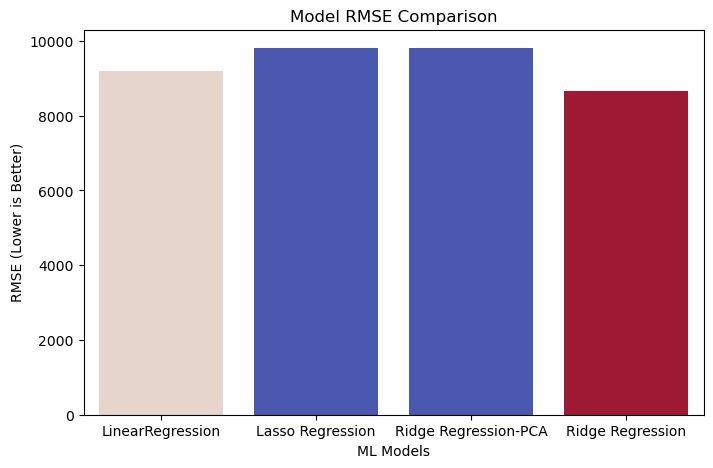

In [683]:
#Visualize RMSE on differnt models
plt.figure(figsize=(8,5))
sns.barplot(x=results.index, y=results["RMSE"], hue=results["R2"], legend=False, palette="coolwarm")
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE (Lower is Better)")
plt.xlabel("ML Models")
plt.show()

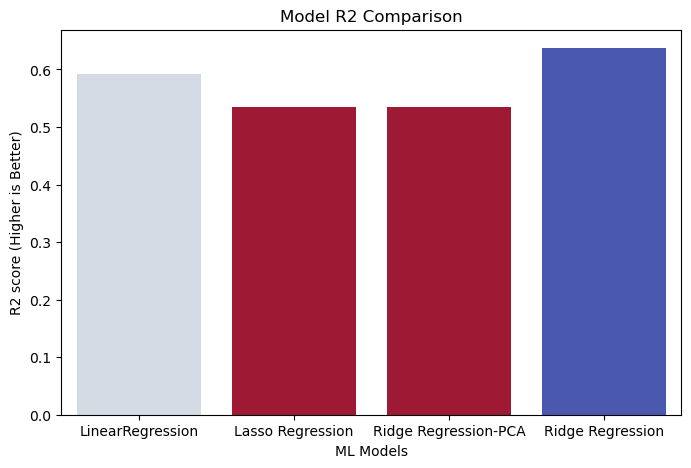

In [684]:
#Visualize R2 on differnt models
plt.figure(figsize=(8,5))
sns.barplot(x=results.index, y=results["R2"], hue=results['RMSE'], legend=False, palette="coolwarm")
plt.title("Model R2 Comparison")
plt.ylabel("R2 score (Higher is Better)")
plt.xlabel("ML Models")
plt.show()

### Feature Importance

**Visualize Feature Importance on test data**

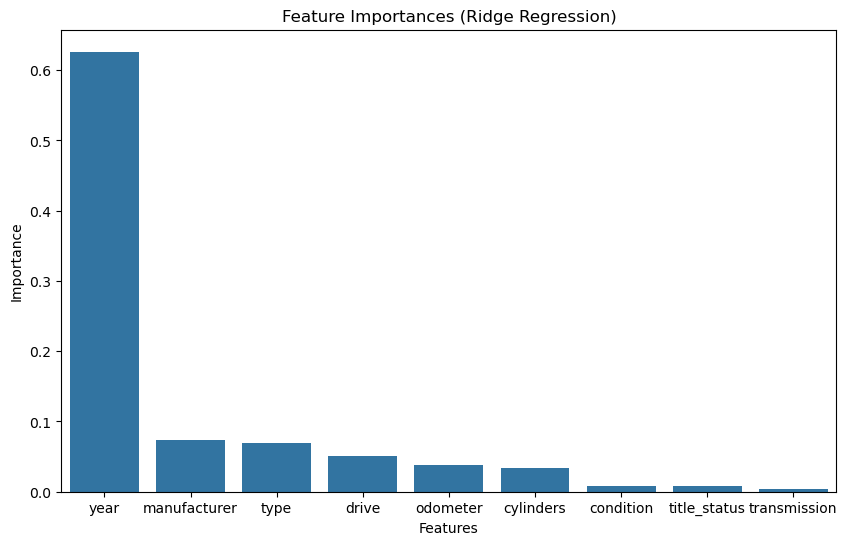

In [685]:
plt.figure(figsize=(10,6))
sns.barplot(x=ridge_importances.index, y='Importance', data=ridge_importances)
plt.title('Feature Importances (Ridge Regression)')
plt.xlabel("Features")
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Findings

### Feature Importance
Visualizing importance of features from Ridge regression model - year(age), manufacturer, type, drive and odometer are the important features that influence the car price.

Based on the analysis of different plots, these are the findings:

-Price of older cars with high mileage is much depreciated

-Pickup/SUV/coupe/convertible type vehicles have high resale value

### Recommendations
Recommendation is to increase the inventory of newer 4wd Japanese pickup/SUV with low miles for better sales. Limited stock of expensive cars from Mercedes-Benz/Porsche/Ferrari in good condition will also boost overall car sales